<h1 align="center">Classifying MNIST digits using ConvNets</h1>

## Introduction

In a related notebook, I'd classified MNIST digits with basic MultiLayered Perceptrons using Keras. In this part however, I'll try Convolutional Neural Networks for the same task. CNNs are neural networks specially designed for Image Classification. Their architecture is a lot different than that of an MLP. To describe it in very brief - CNNs find patterns in images using operations Convolution followed by Pooling.

In this notebook, we'll define seveal CNN architectures using `Keras` and try to classify the images with as much accuracy as possible.

Let's begin by importing the needed libraries.

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 4.5)

In [135]:
K.image_data_format()

'channels_last'

What is the backend used by Keras?

In [136]:
K.backend()

'tensorflow'

Define common CNN parameters

In [0]:
batch_size = 128
num_classes = 10
epochs = 20
# input image dimensions
img_rows, img_cols = 28, 28

## Sample MNIST images

Load the data and display a few digits

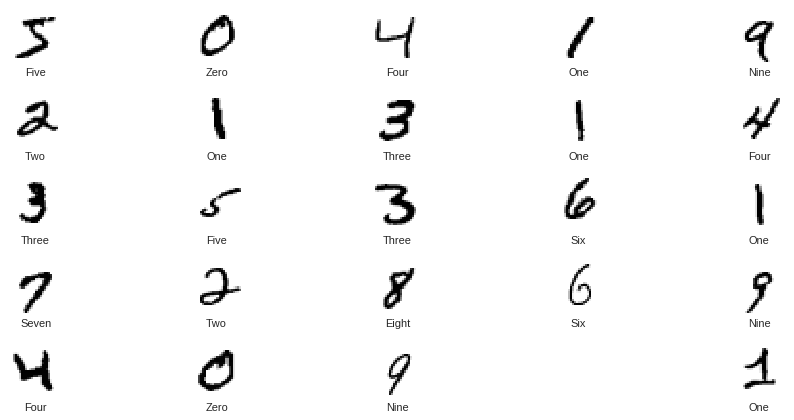

In [138]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

plt.figure(figsize=(14,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    plt.tight_layout()

Reshape the 2D image vectors into 1D vectors

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

## Normalize the data

The image vectors currently have digits from 0 to 255. Convert the numbers in range [0, 1]. 

In [140]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Convert the digits 1 to 9 into a categorical vector.

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Some Terminology

We'll use these abbreviations to indicate the network architecture:

* C = Convolutional Layer
* MP = Maxpooling Layer
* DO = DropOuts Layer
* D = Dense Layer

## Model 1:

First, let's try a very basic architecture with just one Convolutional layer.

**[64(C)-MP-DO-16(D)-10]**

In [0]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(4, 4),
                 activation='tanh',
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

Compile the model

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Fit the model

In [153]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 164us/step - loss: 1.0602 - acc: 0.6130 - val_loss: 0.2666 - val_acc: 0.9441
Epoch 2/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.7291 - acc: 0.7279 - val_loss: 0.1863 - val_acc: 0.9569
Epoch 3/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.6289 - acc: 0.7720 - val_loss: 0.1457 - val_acc: 0.9646
Epoch 4/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.5827 - acc: 0.7884 - val_loss: 0.1243 - val_acc: 0.9676
Epoch 5/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.5595 - acc: 0.7982 - val_loss: 0.1160 - val_acc: 0.9709
Epoch 6/20
60000/60000 [==============================] - 7s 108us/step - loss: 0.5408 - acc: 0.8060 - val_loss: 0.1169 - val_acc: 0.9711
Epoch 7/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.5253 - acc: 0.8070 - val_loss: 0.1076 -

Train and Test accuracy 

In [154]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Test accuracy: 0.9778
Train accuracy: 0.9844333333333334


In [23]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['#', 'CNN Architecture', 'Train Accuracy', 'Test Accuracy']

table.add_row(['1', '64(C)-MP-DO-16(D)-10', '0.985', '0.978'])

## Model 2: 



**[64(C)-MP-DO-128(D)-DO-10]**

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

Compile the model

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Train the model

In [145]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.2696 - acc: 0.9166 - val_loss: 0.0608 - val_acc: 0.9801
Epoch 2/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0858 - acc: 0.9743 - val_loss: 0.0380 - val_acc: 0.9869
Epoch 3/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0668 - acc: 0.9799 - val_loss: 0.0333 - val_acc: 0.9889
Epoch 4/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0534 - acc: 0.9839 - val_loss: 0.0310 - val_acc: 0.9900
Epoch 5/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0473 - acc: 0.9856 - val_loss: 0.0271 - val_acc: 0.9906
Epoch 6/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0416 - acc: 0.9876 - val_loss: 0.0305 - val_acc: 0.9899
Epoch 7/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0372 - acc: 0.9886 - val_loss: 0.

In [146]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Train accuracy: 0.9988166666666667
Test accuracy: 0.9922


In [25]:
table.add_row(['2', '64(C)-MP-DO-128(D)-DO-10', '0.999', '0.993'])

## Model 3



**[ 64(C) - MP - DO - BN - 128(C) - MP - DO - 16(D) - 10(Output) ]**

In [0]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [149]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 221us/step - loss: 1.9774 - acc: 0.2358 - val_loss: 1.4515 - val_acc: 0.5499
Epoch 2/20
60000/60000 [==============================] - 9s 157us/step - loss: 1.8008 - acc: 0.2796 - val_loss: 1.2765 - val_acc: 0.6234
Epoch 3/20
60000/60000 [==============================] - 9s 158us/step - loss: 1.7125 - acc: 0.3158 - val_loss: 0.9743 - val_acc: 0.7696
Epoch 4/20
60000/60000 [==============================] - 9s 157us/step - loss: 1.5050 - acc: 0.4127 - val_loss: 0.6432 - val_acc: 0.9354
Epoch 5/20
60000/60000 [==============================] - 10s 159us/step - loss: 1.2674 - acc: 0.5400 - val_loss: 0.4561 - val_acc: 0.9697
Epoch 6/20
60000/60000 [==============================] - 10s 159us/step - loss: 1.1427 - acc: 0.5878 - val_loss: 0.3867 - val_acc: 0.9740
Epoch 7/20
60000/60000 [==============================] - 10s 161us/step - loss: 1.0757 - acc: 0.6083 - val_loss: 0.336

In [150]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Test accuracy: 0.9872
Train accuracy: 0.9913166666666666


In [26]:
table.add_row(['3', '64(C) - MP - DO - BN - 128(C) - MP - DO - 16(D) - 10', '0.992', '0.988'])

## Model 4:

Now, let's try a much more complex model.

**[ 128(C)-MP-DO-BN-64(C)-MP-DO-32(C)-MP-DO-256(C)-16(D)-DO-10 ]**

In [0]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(2, 2),
                 activation='tanh',
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='tanh'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='tanh'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(2, 2),
                 activation='relu'))


model.add(Flatten())
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

Compile the model

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Fit the model

In [157]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 294us/step - loss: 1.4442 - acc: 0.5299 - val_loss: 0.5345 - val_acc: 0.9486
Epoch 2/20
60000/60000 [==============================] - 14s 225us/step - loss: 0.7933 - acc: 0.7622 - val_loss: 0.2496 - val_acc: 0.9690
Epoch 3/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.6425 - acc: 0.7968 - val_loss: 0.1619 - val_acc: 0.9737
Epoch 4/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.5622 - acc: 0.8158 - val_loss: 0.1175 - val_acc: 0.9786
Epoch 5/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.5174 - acc: 0.8256 - val_loss: 0.1097 - val_acc: 0.9772
Epoch 6/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.4901 - acc: 0.8323 - val_loss: 0.0961 - val_acc: 0.9783
Epoch 7/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.4741 - acc: 0.8328 - val_loss: 0.

In [158]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Test accuracy: 0.9885
Train accuracy: 0.9894833333333334


In [27]:
table.add_row(['4', '128(C)-MP-DO-BN-64(C)-MP-DO-32(C)-MP-DO\n-256(C)-16(D)-DO-10', '0.989', '0.9885'])

# Conclusion

* We tried 4 different Convolutional Neural Nets with increasing complexities and varying types of activation functions. The purpose of this study was to learn how Keras lets us build complex models with very few lines of code.

* Best accuracy of 99.3% was obtained with the second model having one convolutional, maxpooling and dropout layer.

            64(C)-MP-DO-128(D)-DO-10

 but even the most basic model gave an accuracy of 97.8% which just goes to show how powerful CNNs can be.

In [28]:
print(table)

+---+------------------------------------------------------+----------------+---------------+
| # |                   CNN Architecture                   | Train Accuracy | Test Accuracy |
+---+------------------------------------------------------+----------------+---------------+
| 1 |                 64(C)-MP-DO-16(D)-10                 |     0.985      |     0.978     |
| 2 |               64(C)-MP-DO-128(D)-DO-10               |     0.999      |     0.993     |
| 3 | 64(C) - MP - DO - BN - 128(C) - MP - DO - 16(D) - 10 |     0.992      |     0.988     |
| 4 |       128(C)-MP-DO-BN-64(C)-MP-DO-32(C)-MP-DO        |     0.989      |     0.9885    |
|   |                 -256(C)-16(D)-DO-10                  |                |               |
+---+------------------------------------------------------+----------------+---------------+
